In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
glob.glob("../results/window_stats/*_100kb_pi.txt")

['../results/window_stats/Pithecia_vanzolinii_ssp_100kb_pi.txt',
 '../results/window_stats/Callithrix_kuhlii_ssp_100kb_pi.txt',
 '../results/window_stats/Hylobates_pileatus_ssp_100kb_pi.txt',
 '../results/window_stats/Plecturocebus_cupreus_ssp_100kb_pi.txt',
 '../results/window_stats/Alouatta_belzebul_ssp_100kb_pi.txt',
 '../results/window_stats/Trachypithecus_poliocephalus_ssp_100kb_pi.txt',
 '../results/window_stats/Macaca_nemestrina_ssp_100kb_pi.txt',
 '../results/window_stats/Papio_hamadryas_ssp_100kb_pi.txt',
 '../results/window_stats/Propithecus_diadema_ssp_100kb_pi.txt',
 '../results/window_stats/Cercopithecus_denti_ssp_100kb_pi.txt',
 '../results/window_stats/Cercopithecus_hamlyni_ssp_100kb_pi.txt',
 '../results/window_stats/Cebus_albifrons_ssp_100kb_pi.txt',
 '../results/window_stats/Cheirogaleus_medius_ssp_100kb_pi.txt',
 '../results/window_stats/Plecturocebus_brunneus_ssp_100kb_pi.txt',
 '../results/window_stats/Macaca_leucogenys_ssp_100kb_pi.txt',
 '../results/window_stats/

In [3]:
df_l = []
for p in glob.glob("../results/window_stats/*_100kb_pi.txt"):
    df_pi = pd.read_csv(p, sep="\t", index_col=[0])
    aut_pi = df_pi.loc[(df_pi.callable_frac >= 0.75) & (df_pi.chr_type == "aut")]["pi"].mean()
    df_pi["norm_pi"] = df_pi["pi"]/aut_pi
    df_l.append(df_pi)
df_pi100kb = pd.concat(df_l)

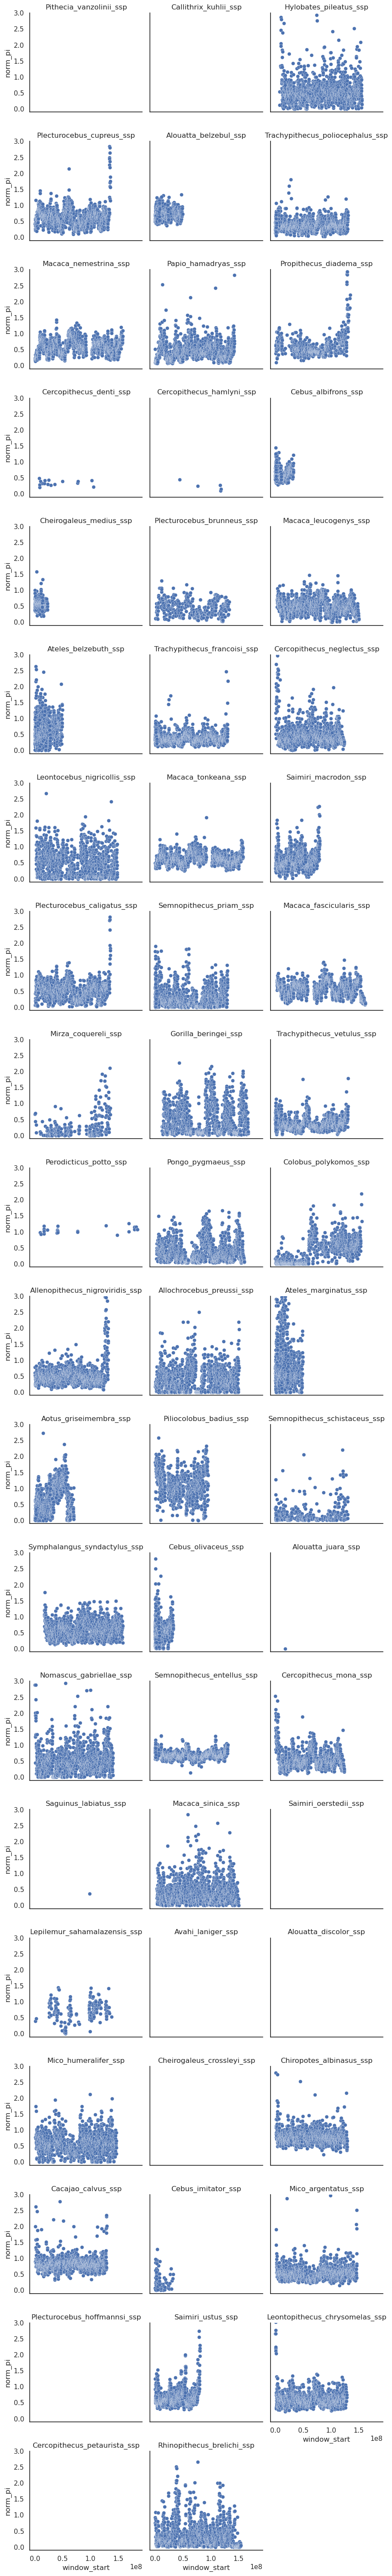

In [4]:
g = sns.FacetGrid(df_pi100kb.loc[(df_pi100kb["chr_type"] == "chrX") &
                                (df_pi100kb.callable_frac >= 0.75)], col="species", col_wrap=3)
g.map(sns.scatterplot, "window_start", "norm_pi", linewidth = 0.25)
g.set(ylim=(-0.1, 3))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

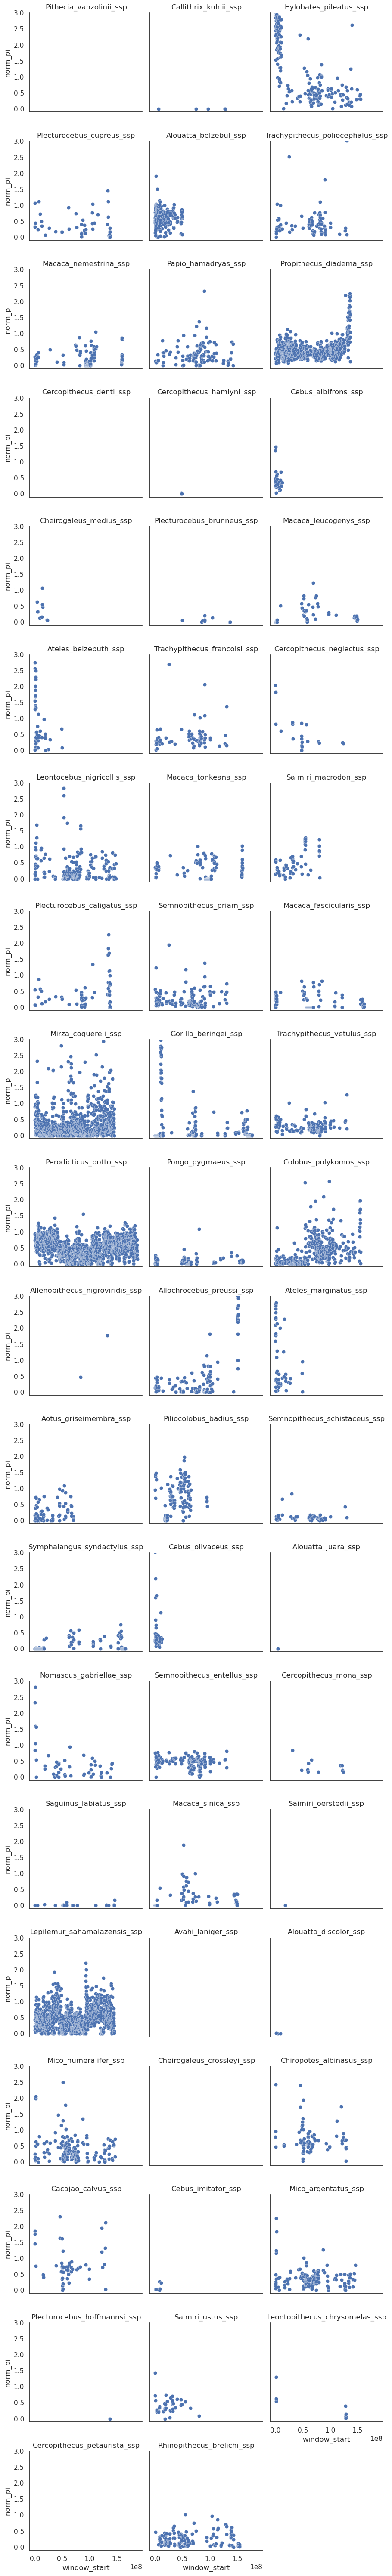

In [5]:
g = sns.FacetGrid(df_pi100kb.loc[(df_pi100kb["chr_type"] == "chrX") &
                                (df_pi100kb.callable_frac <= 0.75)], col="species", col_wrap=3)
g.map(sns.scatterplot, "window_start", "norm_pi", linewidth = 0.25)
g.set(ylim=(-0.1, 3))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

In [6]:
df_pi100kb.loc[(df_pi100kb.species == "Avahi_laniger_ssp") &
              (df_pi100kb.chr_type == "chrX")]

window_start  pi           chrom  window_end  callable_frac chr_type  \
0                0 NaN  HiC_scaffold_2      100000        0.35138     chrX   
1           100000 NaN  HiC_scaffold_2      200000        0.37222     chrX   
2           200000 NaN  HiC_scaffold_2      300000        0.20395     chrX   
3           300000 NaN  HiC_scaffold_2      400000        0.41466     chrX   
4           400000 NaN  HiC_scaffold_2      500000        0.48657     chrX   
...            ...  ..             ...         ...            ...      ...   
1365     136500000 NaN  HiC_scaffold_2   136600000        0.17303     chrX   
1366     136600000 NaN  HiC_scaffold_2   136700000        0.28813     chrX   
1367     136700000 NaN  HiC_scaffold_2   136800000        0.17862     chrX   
1368     136800000 NaN  HiC_scaffold_2   136900000        0.23513     chrX   
1369     136900000 NaN  HiC_scaffold_2   137000000        0.04108     chrX   

                species  norm_pi  
0     Avahi_laniger_ssp      NaN  
1     Avahi_laniger_ssp      NaN  
2     Avahi_laniger_ssp      NaN  
3     Avahi_laniger_ssp      NaN  
4     Avahi_laniger_ssp      NaN  
...                 ...      ...  
1365  Avahi_laniger_ssp      NaN  
1366  Avahi_laniger_ssp      NaN  
1367  Avahi_laniger_ssp      NaN  
1368  Avahi_laniger_ssp      NaN  
1369  Avahi_laniger_ssp      NaN  

[1370 rows x 8 columns]

In [7]:
df_pi100kb["frac_bins"] = pd.cut(df_pi100kb["callable_frac"], bins=[0, 0.5, 0.75, 0.9, 0.95, 1])

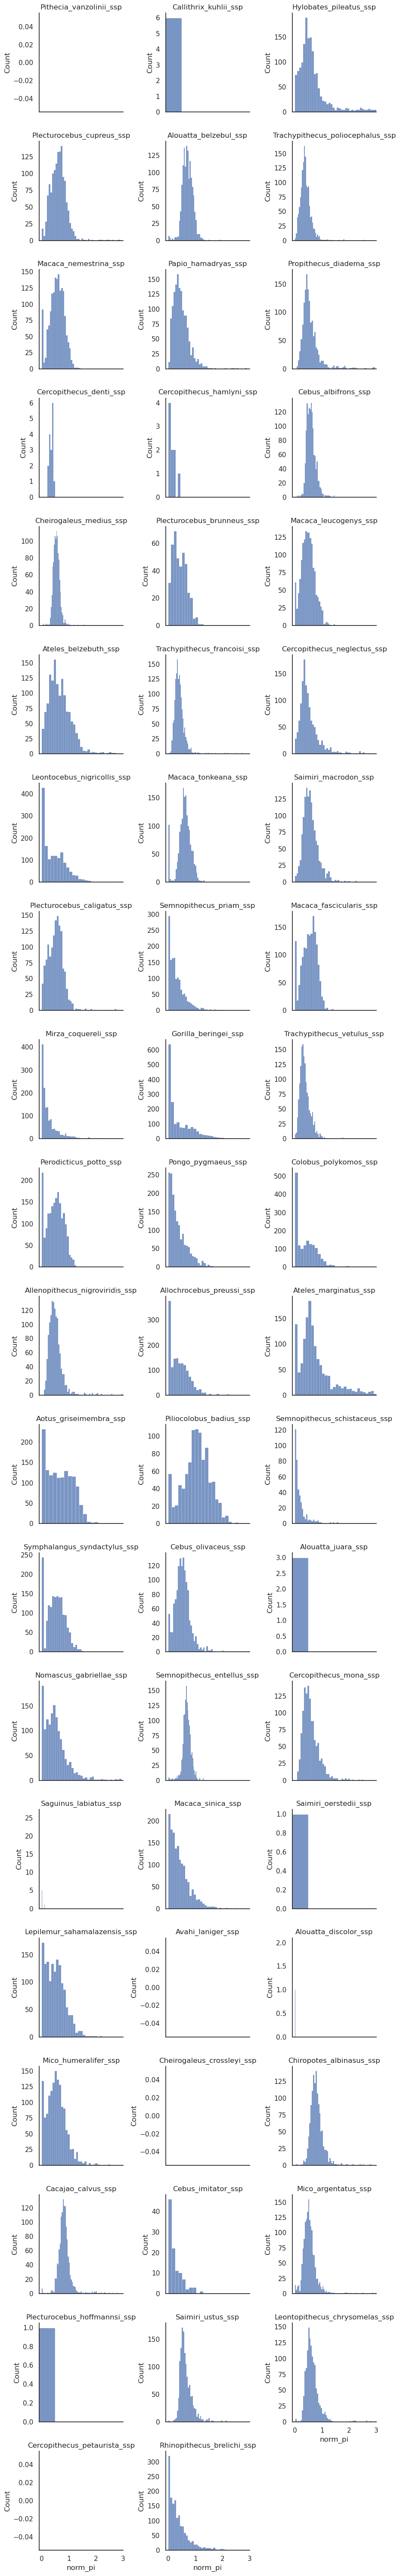

In [8]:
g = sns.FacetGrid(df_pi100kb.loc[(df_pi100kb["chr_type"] == "chrX")], col="species", col_wrap=3, sharey=False)
g.map(sns.histplot, "norm_pi", common_norm=False)
g.set(xlim=(-0.1, 3))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


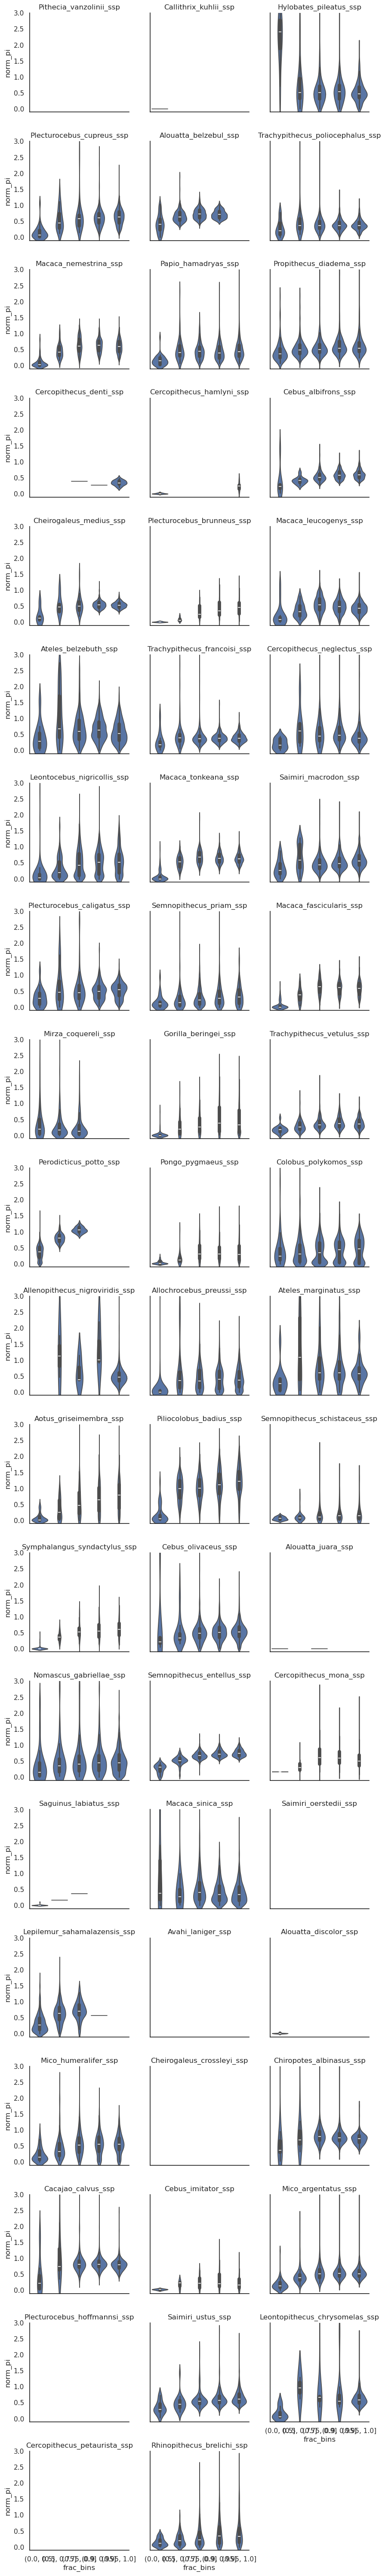

In [9]:
g = sns.FacetGrid(df_pi100kb.loc[(df_pi100kb["chr_type"] == "chrX")], col="species", col_wrap=3)
g.map(sns.violinplot, "frac_bins", "norm_pi")
g.set(ylim=(-0.1, 3))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

In [10]:
df_chromcount = df_pi100kb.loc[df_pi100kb["chr_type"] == "chrX"][["species", "chrom"]].value_counts().reset_index()

In [11]:
df_chromcount.groupby("species")["count"].sum()

species
Allenopithecus_nigroviridis_ssp     1323
Allochrocebus_preussi_ssp           1520
Alouatta_belzebul_ssp               1377
Alouatta_discolor_ssp               1378
Alouatta_juara_ssp                  1377
Aotus_griseimembra_ssp              1367
Ateles_belzebuth_ssp                1377
Ateles_marginatus_ssp               1377
Avahi_laniger_ssp                   1370
Cacajao_calvus_ssp                  1295
Callithrix_kuhlii_ssp               1469
Cebus_albifrons_ssp                 1331
Cebus_imitator_ssp                  1331
Cebus_olivaceus_ssp                 1331
Cercopithecus_denti_ssp             1242
Cercopithecus_hamlyni_ssp           1242
Cercopithecus_mona_ssp              1242
Cercopithecus_neglectus_ssp         1242
Cercopithecus_petaurista_ssp        1242
Cheirogaleus_crossleyi_ssp          1078
Cheirogaleus_medius_ssp             1078
Chiropotes_albinasus_ssp            1295
Colobus_polykomos_ssp               1558
Gorilla_beringei_ssp                1775
Hylobate

In [12]:
df_chromcount.groupby("species")["chrom"].nunique()

species
Allenopithecus_nigroviridis_ssp      1
Allochrocebus_preussi_ssp            1
Alouatta_belzebul_ssp                7
Alouatta_discolor_ssp                7
Alouatta_juara_ssp                   7
Aotus_griseimembra_ssp               4
Ateles_belzebuth_ssp                 7
Ateles_marginatus_ssp                7
Avahi_laniger_ssp                    1
Cacajao_calvus_ssp                   1
Callithrix_kuhlii_ssp                1
Cebus_albifrons_ssp                 20
Cebus_imitator_ssp                  20
Cebus_olivaceus_ssp                 20
Cercopithecus_denti_ssp              1
Cercopithecus_hamlyni_ssp            1
Cercopithecus_mona_ssp               1
Cercopithecus_neglectus_ssp          1
Cercopithecus_petaurista_ssp         1
Cheirogaleus_crossleyi_ssp           9
Cheirogaleus_medius_ssp              9
Chiropotes_albinasus_ssp             1
Colobus_polykomos_ssp                1
Gorilla_beringei_ssp                 1
Hylobates_pileatus_ssp               1
Leontocebus_nigri

In [13]:
df_pi100kb.loc[df_pi100kb.chr_type == "chrX"].groupby(["species"])["pi"].mean().reset_index()["pi"]/df_pi100kb.loc[df_pi100kb.chr_type == "aut"].groupby(["species"])["pi"].mean().reset_index()["pi"]

0     0.551678
1     0.445198
2     0.727340
3     0.008609
4     0.000000
5     0.741620
6     0.659914
7     0.774239
8          NaN
9     0.861149
10    0.000000
11    0.595689
12    0.258393
13    0.538361
14    0.347465
15    0.137806
16    0.578775
17    0.543666
18         NaN
19         NaN
20    0.545523
21    0.831559
22    0.421429
23    0.470327
24    0.677804
25    0.458775
26    0.631430
27    0.569328
28    0.567644
29    0.484391
30    0.591514
31    0.435484
32    0.627211
33    0.527441
34    0.520923
35    0.407626
36    0.515415
37    0.475417
38    0.651126
39    1.044740
40         NaN
41    0.418977
42    0.525302
43    0.621925
44    0.000000
45    0.368178
46    0.695051
47    0.385658
48    0.019570
49    0.579991
50    0.000000
51    0.656741
52    0.696178
53    0.312539
54    0.207103
55    0.583092
56    0.427244
57    0.415921
58    0.384655
Name: pi, dtype: float64

In [14]:
df_pi100kb.loc[df_pi100kb.chr_type == "chrX"].groupby(["species"]).count().reset_index().species

0      Allenopithecus_nigroviridis_ssp
1            Allochrocebus_preussi_ssp
2                Alouatta_belzebul_ssp
3                Alouatta_discolor_ssp
4                   Alouatta_juara_ssp
5               Aotus_griseimembra_ssp
6                 Ateles_belzebuth_ssp
7                Ateles_marginatus_ssp
8                    Avahi_laniger_ssp
9                   Cacajao_calvus_ssp
10               Callithrix_kuhlii_ssp
11                 Cebus_albifrons_ssp
12                  Cebus_imitator_ssp
13                 Cebus_olivaceus_ssp
14             Cercopithecus_denti_ssp
15           Cercopithecus_hamlyni_ssp
16              Cercopithecus_mona_ssp
17         Cercopithecus_neglectus_ssp
18        Cercopithecus_petaurista_ssp
19          Cheirogaleus_crossleyi_ssp
20             Cheirogaleus_medius_ssp
21            Chiropotes_albinasus_ssp
22               Colobus_polykomos_ssp
23                Gorilla_beringei_ssp
24              Hylobates_pileatus_ssp
25         Leontocebus_ni

In [15]:
mean_pis = pd.DataFrame({"species": df_pi100kb.loc[df_pi100kb.chr_type == "chrX"].groupby(["species"]).count().reset_index().species,
             "X_a_ratio": df_pi100kb.loc[df_pi100kb.chr_type == "chrX"].groupby(["species"])["pi"].mean().reset_index()["pi"]/df_pi100kb.loc[df_pi100kb.chr_type == "aut"].groupby(["species"])["pi"].mean().reset_index()["pi"],
             "aut_pi": df_pi100kb.loc[df_pi100kb.chr_type == "aut"].groupby(["species"])["pi"].mean().reset_index()["pi"]})

In [16]:
mean_pis

species  X_a_ratio      aut_pi
0    Allenopithecus_nigroviridis_ssp   0.551678  137.790676
1          Allochrocebus_preussi_ssp   0.445198  228.356542
2              Alouatta_belzebul_ssp   0.727340  427.261185
3              Alouatta_discolor_ssp   0.008609  183.923490
4                 Alouatta_juara_ssp   0.000000  181.139608
5             Aotus_griseimembra_ssp   0.741620  144.941488
6               Ateles_belzebuth_ssp   0.659914  246.405878
7              Ateles_marginatus_ssp   0.774239  144.846746
8                  Avahi_laniger_ssp        NaN  285.819263
9                 Cacajao_calvus_ssp   0.861149  136.129495
10             Callithrix_kuhlii_ssp   0.000000  199.254839
11               Cebus_albifrons_ssp   0.595689  226.431955
12                Cebus_imitator_ssp   0.258393   62.756523
13               Cebus_olivaceus_ssp   0.538361  133.006248
14           Cercopithecus_denti_ssp   0.347465  271.190125
15         Cercopithecus_hamlyni_ssp   0.137806  423.836928
16            Cercopithecus_mona_ssp   0.578775  339.902366
17       Cercopithecus_neglectus_ssp   0.543666  203.243890
18      Cercopithecus_petaurista_ssp        NaN  326.685585
19        Cheirogaleus_crossleyi_ssp        NaN  437.528205
20           Cheirogaleus_medius_ssp   0.545523  537.359342
21          Chiropotes_albinasus_ssp   0.831559  135.187141
22             Colobus_polykomos_ssp   0.421429  253.362052
23              Gorilla_beringei_ssp   0.470327   95.517353
24            Hylobates_pileatus_ssp   0.677804   85.219267
25       Leontocebus_nigricollis_ssp   0.458775  145.856067
26    Leontopithecus_chrysomelas_ssp   0.631430  135.029906
27      Lepilemur_sahamalazensis_ssp   0.569328  114.777778
28           Macaca_fascicularis_ssp   0.567644  345.121902
29             Macaca_leucogenys_ssp   0.484391  265.062230
30             Macaca_nemestrina_ssp   0.591514  287.693317
31                 Macaca_sinica_ssp   0.435484  137.783930
32               Macaca_tonkeana_ssp   0.627211  229.519894
33               Mico_argentatus_ssp   0.527441  133.587651
34              Mico_humeralifer_ssp   0.520923  139.189862
35               Mirza_coquereli_ssp   0.407626   86.896763
36           Nomascus_gabriellae_ssp   0.515415  163.292365
37               Papio_hamadryas_ssp   0.475417  149.476548
38            Perodicticus_potto_ssp   0.651126  388.679725
39           Piliocolobus_badius_ssp   1.044740  269.208597
40           Pithecia_vanzolinii_ssp        NaN  140.855606
41        Plecturocebus_brunneus_ssp   0.418977  182.548469
42       Plecturocebus_caligatus_ssp   0.525302  212.021060
43         Plecturocebus_cupreus_ssp   0.621925  195.770670
44      Plecturocebus_hoffmannsi_ssp   0.000000  293.035714
45                Pongo_pygmaeus_ssp   0.368178  173.874743
46           Propithecus_diadema_ssp   0.695051  255.953033
47        Rhinopithecus_brelichi_ssp   0.385658   57.620838
48             Saguinus_labiatus_ssp   0.019570  128.403607
49              Saimiri_macrodon_ssp   0.579991  201.004016
50             Saimiri_oerstedii_ssp   0.000000   14.797235
51                 Saimiri_ustus_ssp   0.656741  199.951672
52        Semnopithecus_entellus_ssp   0.696178  931.749450
53           Semnopithecus_priam_ssp   0.312539  292.571429
54     Semnopithecus_schistaceus_ssp   0.207103   76.630952
55      Symphalangus_syndactylus_ssp   0.583092  156.208307
56      Trachypithecus_francoisi_ssp   0.427244  108.688148
57  Trachypithecus_poliocephalus_ssp   0.415921   87.575117
58        Trachypithecus_vetulus_ssp   0.384655  346.857143

<Axes: xlabel='aut_pi', ylabel='X_a_ratio'>

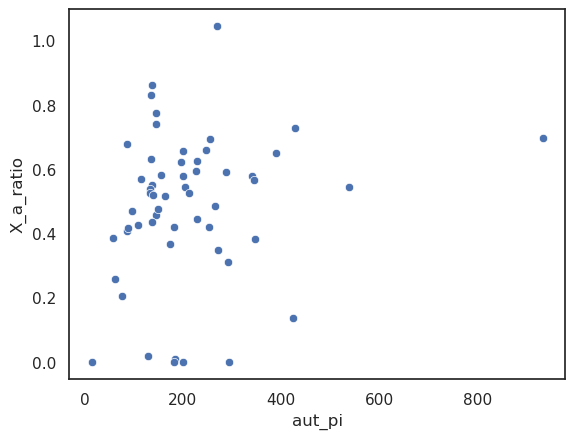

In [17]:
sns.scatterplot(mean_pis, x="aut_pi", y="X_a_ratio")

Compara Fst, het and pi.

In [18]:
(len(glob.glob("../results/window_stats/*_100kb_pi.txt")),
len(glob.glob("../results/window_stats/*_100kb_het.txt")),
len(glob.glob("../results/window_stats/*_Fst.txt")))

(59, 81, 63)

In [19]:
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
full_dfs = []
for x in glob.glob(metadata_path+"*_individuals.txt"):
    short_form = x.split("/")[-1].split("_")[0]
    long_form = x.split("/")[-1]
    # Loading the various metadata files. Metadata, contig information, callability bed.
    metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
    metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
    metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]
    regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
    for f in metadata_df.GVCF_FOLDER.unique():
        r_df = regions_df.loc[regions_df.REFERENCE_FOLDER == f]
        if os.path.exists("../results/window_stats/{}_Fst.txt".format(f)) and \
           os.path.exists("../results/window_stats/{}_100kb_het.txt".format(f)) and \
           os.path.exists("../results/window_stats/{}_100kb_pi.txt".format(f)):
            print(f)
            full_dfs.append(f)

Saguinus_labiatus_ssp
Papio_hamadryas_ssp
Cercopithecus_denti_ssp
Cercopithecus_hamlyni_ssp
Cercopithecus_mona_ssp
Cercopithecus_neglectus_ssp
Perodicticus_potto_ssp
Ateles_belzebuth_ssp
Allenopithecus_nigroviridis_ssp
Pongo_pygmaeus_ssp
Cheirogaleus_medius_ssp
Semnopithecus_entellus_ssp
Semnopithecus_schistaceus_ssp
Avahi_laniger_ssp
Mico_argentatus_ssp
Propithecus_diadema_ssp
Gorilla_beringei_ssp
Aotus_griseimembra_ssp
Plecturocebus_brunneus_ssp
Plecturocebus_caligatus_ssp
Plecturocebus_cupreus_ssp
Cebus_albifrons_ssp
Cebus_imitator_ssp
Cebus_olivaceus_ssp
Alouatta_belzebul_ssp
Alouatta_discolor_ssp
Alouatta_juara_ssp
Macaca_nemestrina_ssp
Macaca_tonkeana_ssp
Macaca_leucogenys_ssp
Hylobates_pileatus_ssp
Trachypithecus_francoisi_ssp
Trachypithecus_poliocephalus_ssp
Trachypithecus_vetulus_ssp
Cacajao_calvus_ssp
Symphalangus_syndactylus_ssp
Leontopithecus_chrysomelas_ssp
Chiropotes_albinasus_ssp
Saimiri_macrodon_ssp
Saimiri_ustus_ssp
Rhinopithecus_brelichi_ssp


In [20]:
len(full_dfs)

41

In [21]:
df_lp, df_lh, df_lfst = [], [], []
for x in full_dfs[6:7]:
    df_pi = pd.read_csv("../results/window_stats/{}_100kb_pi.txt".format(x), sep="\t", index_col=[0])
    aut_pi = df_pi.loc[(df_pi.callable_frac >= 0.75) & (df_pi.chr_type == "aut")]["pi"].mean()
    df_pi["norm_pi"] = df_pi["pi"]/aut_pi
    df_lp.append(df_pi)
    df_het = pd.read_csv("../results/window_stats/{}_100kb_het.txt".format(x), sep="\t", index_col=[0])
    df_lh.append(df_het)
    df_fst = pd.read_csv("../results/window_stats/{}_Fst.txt".format(x), sep="\t", index_col=[0])
    df_lfst.append(df_fst)

In [22]:
df_pi.groupby("chr_type")[["pi"]].mean()

pi
chr_type            
aut       388.679725
chrX      253.079616

In [23]:
df_fst
#sns.clustermap(df_fst.loc[df_fst.chr_type == "aut"].iloc[:,:len(df_fst.columns)-4].clip(0).fillna(0))

PD_0165   PD_0627  SAMN37320038        chrom  variants_used chr_type  \
0       NaN  0.737404      0.702164  NC_069780.1        6174791      aut   
1  0.737404       NaN      0.739844  NC_069780.1        6174791      aut   
2  0.702164  0.739844           NaN  NC_069780.1        6174791      aut   
0       NaN  0.871663      0.781199  NC_069804.1        3893823     chrX   
1  0.871663       NaN      0.857424  NC_069804.1        3893823     chrX   
2  0.781199  0.857424           NaN  NC_069804.1        3893823     chrX   

                  species  
0  Perodicticus_potto_ssp  
1  Perodicticus_potto_ssp  
2  Perodicticus_potto_ssp  
0  Perodicticus_potto_ssp  
1  Perodicticus_potto_ssp  
2  Perodicticus_potto_ssp

In [24]:
df_het.groupby("chr_type")[df_het.columns[:-6]].mean()

PD_0165  PD_0627  SAMN37320038
chr_type                                   
aut       177.421294  79.5838    114.346409
chrX       84.267876   0.0000     61.796692

In [25]:
df_het#.groupby("chr_type")[["PD_0120", "PD_0348"]].mean()

PD_0165  PD_0627  SAMN37320038  window_start        chrom  window_end  \
0        47.0     29.0          33.0             0  NC_069780.1      100000   
1       101.0     25.0          26.0        100000  NC_069780.1      200000   
2       192.0     44.0          37.0        200000  NC_069780.1      300000   
3       152.0      4.0           6.0        300000  NC_069780.1      400000   
4       188.0      3.0           2.0        400000  NC_069780.1      500000   
...       ...      ...           ...           ...          ...         ...   
3832     75.0      0.0          35.0     186900000  NC_069804.1   187000000   
3833     52.0      0.0          18.0     187000000  NC_069804.1   187100000   
3834    106.0      0.0          89.0     187100000  NC_069804.1   187200000   
3835    210.0      0.0         181.0     187200000  NC_069804.1   187300000   
3836     79.0      0.0          96.0     187300000  NC_069804.1   187400000   

      callable_frac chr_type                 species  
0           0.48106      aut  Perodicticus_potto_ssp  
1           0.53700      aut  Perodicticus_potto_ssp  
2           0.49376      aut  Perodicticus_potto_ssp  
3           0.60387      aut  Perodicticus_potto_ssp  
4           0.58502      aut  Perodicticus_potto_ssp  
...             ...      ...                     ...  
3832        0.22717     chrX  Perodicticus_potto_ssp  
3833        0.45362     chrX  Perodicticus_potto_ssp  
3834        0.30112     chrX  Perodicticus_potto_ssp  
3835        0.37407     chrX  Perodicticus_potto_ssp  
3836        0.02012     chrX  Perodicticus_potto_ssp  

[3837 rows x 9 columns]

In [26]:
df_lp, df_lh, df_lfst = [], [], []
for x in full_dfs[10:11]:
    df_pi = pd.read_csv("../results/window_stats/{}_100kb_pi.txt".format(x), sep="\t", index_col=[0])
    aut_pi = df_pi.loc[(df_pi.callable_frac >= 0.75) & (df_pi.chr_type == "aut")]["pi"].mean()
    df_pi["norm_pi"] = df_pi["pi"]/aut_pi
    df_lp.append(df_pi)
    df_het = pd.read_csv("../results/window_stats/{}_100kb_het.txt".format(x), sep="\t", index_col=[0])
    df_lh.append(df_het)
    df_fst = pd.read_csv("../results/window_stats/{}_Fst.txt".format(x), sep="\t", index_col=[0])
    df_lfst.append(df_fst)

In [27]:
df_pi.groupby("chr_type")[["pi"]].mean()

pi
chr_type            
aut       537.359342
chrX      293.141744

In [28]:
df_fst.loc[df_fst.chr_type == "aut"]

PD_0606  SAMN07678072  SAMN11334317  SAMN11334321           chrom  \
0       NaN     -0.787354      0.861526     -0.326145  VBSM01001044.1   
1 -0.787354           NaN      0.860283     -0.326166  VBSM01001044.1   
2  0.861526      0.860283           NaN      0.864736  VBSM01001044.1   
3 -0.326145     -0.326166      0.864736           NaN  VBSM01001044.1   

   variants_used chr_type                  species  
0         212347      aut  Cheirogaleus_medius_ssp  
1         212347      aut  Cheirogaleus_medius_ssp  
2         212347      aut  Cheirogaleus_medius_ssp  
3         212347      aut  Cheirogaleus_medius_ssp

/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


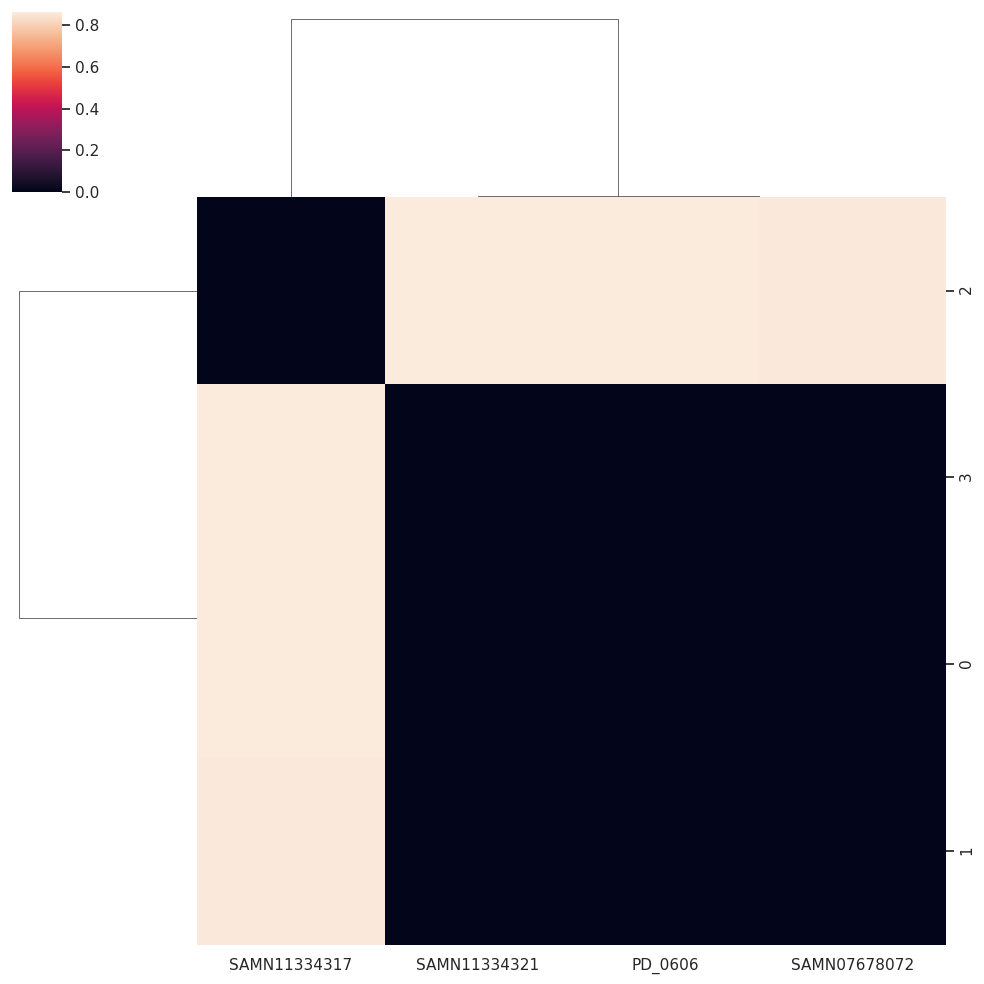

In [29]:
sns.clustermap(df_fst.loc[df_fst.chr_type == "aut"].iloc[:,:len(df_fst.columns)-4].clip(0).fillna(0))

In [30]:
df_fst.loc[df_fst.chr_type == "aut"].iloc[:,:len(df_fst.columns)-4].clip(0).fillna(0).mean()

PD_0606         0.215381
SAMN07678072    0.215071
SAMN11334317    0.646636
SAMN11334321    0.216184
dtype: float64

In [31]:
df_het.groupby("chr_type")[df_het.columns[:-6]].mean()

PD_0606  SAMN07678072  SAMN11334317  SAMN11334321
chr_type                                                      
aut       134.377551    134.908163    163.755102    119.020408
chrX        0.000000     46.775510      0.000000     38.150278

In [32]:
df_het["mean_het"] = df_het[df_het.columns[:-6]].mean(axis=1)

In [33]:
df_het[df_het.columns[:-7]].corr()

PD_0606  SAMN07678072  SAMN11334317  SAMN11334321
PD_0606       1.000000      0.671993      0.536014      0.487688
SAMN07678072  0.671993      1.000000      0.390999      0.639413
SAMN11334317  0.536014      0.390999      1.000000      0.325117
SAMN11334321  0.487688      0.639413      0.325117      1.000000

In [34]:
df_het["pi"] = df_pi["pi"]
df_het_aut = df_het.loc[df_het.chr_type == "aut"]
df_het_aut["pi/mean_het"] = df_het_aut["pi"]/df_het_aut["mean_het"]

/tmp/4734350/ipykernel_372186/344848076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_het_aut["pi/mean_het"] = df_het_aut["pi"]/df_het_aut["mean_het"]


<Axes: xlabel='window_start', ylabel='pi'>

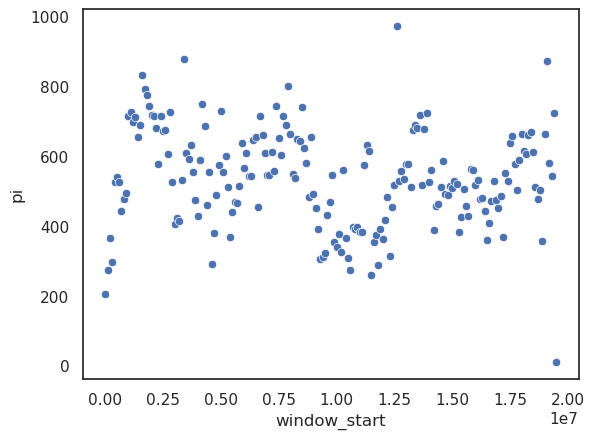

In [35]:
sns.scatterplot(df_het_aut, x="window_start", y="pi")

<Axes: xlabel='window_start', ylabel='mean_het'>

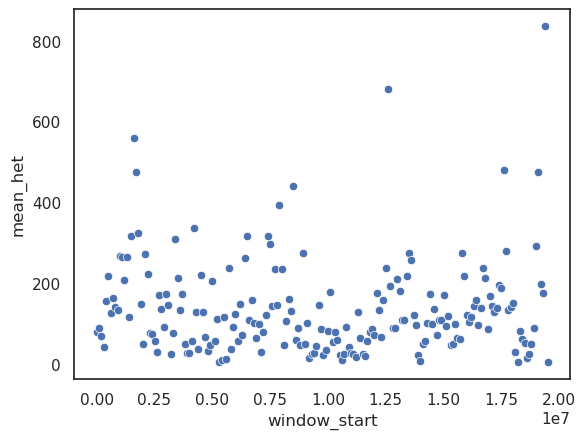

In [36]:
sns.scatterplot(df_het_aut, x="window_start", y="mean_het")

<Axes: xlabel='window_start', ylabel='pi/mean_het'>

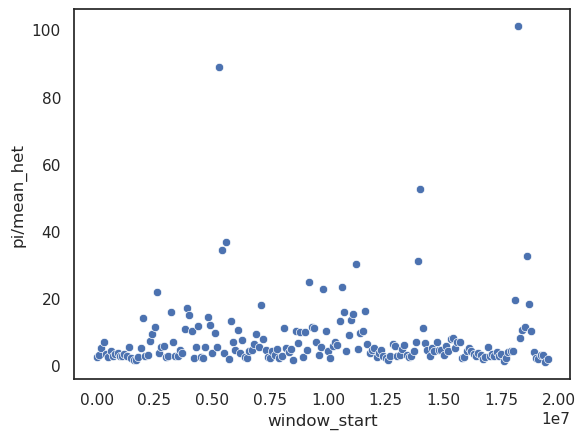

In [37]:
sns.scatterplot(df_het_aut, x="window_start", y="pi/mean_het")

In [133]:
df_lp, df_lh, df_lfst = [], [], []
for x in full_dfs[31:32]:
    df_pi = pd.read_csv("../results/window_stats/{}_100kb_pi.txt".format(x), sep="\t", index_col=[0])
    aut_pi = df_pi.loc[(df_pi.callable_frac >= 0.75) & (df_pi.chr_type == "aut")]["pi"].mean()
    df_pi["norm_pi"] = df_pi["pi"]/aut_pi
    df_lp.append(df_pi)
    df_het = pd.read_csv("../results/window_stats/{}_100kb_het.txt".format(x), sep="\t", index_col=[0])
    df_lh.append(df_het)
    df_fst = pd.read_csv("../results/window_stats/{}_Fst.txt".format(x), sep="\t", index_col=[0])
    df_lfst.append(df_fst)

In [134]:
df_fst

PD_0054  SAMN09935337  SAMN09935338  SAMN09935349  SAMN09935370  \
0        NaN      1.000000      1.000000      0.538213      0.496730   
1   1.000000           NaN      1.000000      0.429784      0.410954   
2   1.000000      1.000000           NaN      0.485710      0.443873   
3   0.538213      0.429784      0.485710           NaN     -0.208371   
4   0.496730      0.410954      0.443873     -0.208371           NaN   
..       ...           ...           ...           ...           ...   
4   0.394205      0.483919      0.450199     -0.103117           NaN   
5   0.484756      0.481197      0.453517     -0.099535     -0.032502   
6   0.777738      0.795613      0.761720      0.220615      0.294804   
7   0.889175      0.886768      0.888601      0.384331      0.484296   
8   0.773524      0.779212      0.758489      0.244207      0.318089   

    SAMN09935372  SAMN09935374  SAMN09935375  SAMN09935394           chrom  \
0       0.681450      0.903297      0.995451      0.947339  NW_022681432.1   
1       0.676201      0.919055      0.995232      0.945272  NW_022681432.1   
2       0.701448      0.918011      0.995769      0.950579  NW_022681432.1   
3      -0.087599      0.467531      0.561461      0.512052  NW_022681432.1   
4      -0.079408      0.490620      0.540192      0.496916  NW_022681432.1   
..           ...           ...           ...           ...             ...   
4      -0.032502      0.294804      0.484296      0.318089  NW_022681445.1   
5            NaN      0.275239      0.417582      0.301056  NW_022681445.1   
6       0.275239           NaN      0.484962      0.271454  NW_022681445.1   
7       0.417582      0.484962           NaN      0.447711  NW_022681445.1   
8       0.301056      0.271454      0.447711           NaN  NW_022681445.1   

    variants_used chr_type                       species  
0           10598     chrX  Trachypithecus_francoisi_ssp  
1           10598     chrX  Trachypithecus_francoisi_ssp  
2           10598     chrX  Trachypithecus_francoisi_ssp  
3           10598     chrX  Trachypithecus_francoisi_ssp  
4           10598     chrX  Trachypithecus_francoisi_ssp  
..            ...      ...                           ...  
4            4428     chrX  Trachypithecus_francoisi_ssp  
5            4428     chrX  Trachypithecus_francoisi_ssp  
6            4428     chrX  Trachypithecus_francoisi_ssp  
7            4428     chrX  Trachypithecus_francoisi_ssp  
8            4428     chrX  Trachypithecus_francoisi_ssp  

[63 rows x 13 columns]

In [68]:
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

In [141]:
x_fst = df_fst.loc[df_fst.chr_type == "aut"].iloc[:,:len(df_fst.columns)-4].fillna(0)
x_fst

PD_0054  SAMN09935337  SAMN09935338  SAMN09935349  SAMN09935370  \
0  0.000000      0.019659      0.031292      0.084876      0.144711   
1  0.019659      0.000000     -0.155205     -0.204021     -0.153157   
2  0.031292     -0.155205      0.000000     -0.068277     -0.067525   
3  0.084876     -0.204021     -0.068277      0.000000     -0.301205   
4  0.144711     -0.153157     -0.067525     -0.301205      0.000000   
5 -0.039918      0.013768      0.028890      0.042229      0.053347   
6  0.160167      0.078473      0.070611      0.082060      0.148657   
7  0.331744      0.213921      0.239110      0.256964      0.234330   
8  0.141440      0.015169      0.059463      0.092914      0.076445   

   SAMN09935372  SAMN09935374  SAMN09935375  SAMN09935394  
0     -0.039918      0.160167      0.331744      0.141440  
1      0.013768      0.078473      0.213921      0.015169  
2      0.028890      0.070611      0.239110      0.059463  
3      0.042229      0.082060      0.256964      0.092914  
4      0.053347      0.148657      0.234330      0.076445  
5      0.000000      0.046690      0.266619      0.052177  
6      0.046690      0.000000      0.181470     -0.070731  
7      0.266619      0.181470      0.000000     -0.024917  
8      0.052177     -0.070731     -0.024917      0.000000

In [138]:
squareform(x_fst)

array([0.01965875, 0.03129206, 0.084876  , 0.14471123, 0.        ,
       0.16016713, 0.33174387, 0.14144012, 0.        , 0.        ,
       0.        , 0.01376812, 0.07847296, 0.21392128, 0.01516919,
       0.        , 0.        , 0.02889035, 0.07061131, 0.2391097 ,
       0.05946313, 0.        , 0.04222853, 0.08206039, 0.25696379,
       0.09291396, 0.05334728, 0.1486575 , 0.23433048, 0.07644477,
       0.04668963, 0.26661876, 0.05217732, 0.18147046, 0.        ,
       0.        ])

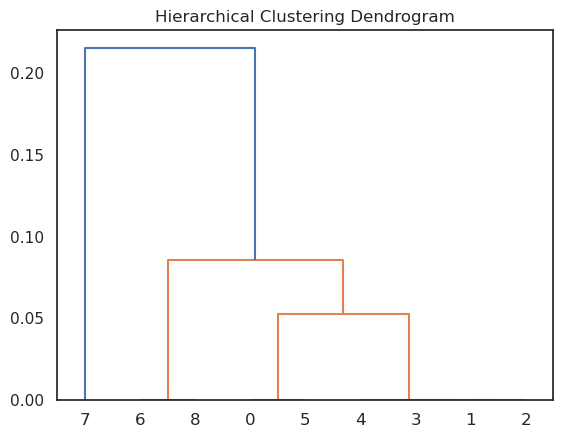

In [145]:
model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")

model = model.fit(x_fst.clip(0))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)

In [140]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0])